## Analiza homomorficzna głosu męskiego

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [14]:
class Sound:
    def __init__(self, filename):
        [self.sample_rate, self.samples] = wavfile.read(f"recordings/{filename}.wav")
        self.filename = filename
        self.logSpectrum = []
        self.cepstrum = []
        self.cepstrumHP = []
        self.cepstrumLP = []
        self.logSpectrumLP = []
        self.logSpectrumHP = []
        self.signalLP = []
        self.signalHP = []

    def calcDuration(self):
        return len(self.samples)/self.sample_rate

    def getTimeAxis(self):
        return np.linspace(0, len(self.samples)/self.sample_rate, len(self.samples))

    def plot(self, signal = [], title='', xlabel='', ylabel='', xAxis = []):
        if not len(signal):
            signal = self.samples
        if not len(xAxis):
            xAxis = range(len(signal))

        plt.figure(figsize=(15, 5))
        plt.plot(xAxis, signal)
        plt.title(f'{title} {self.filename}')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def drawSpectrogram(self, title="Spektrogram"):
        plt.figure(figsize=(15, 5))
        plt.specgram(self.samples, Fs=self.sample_rate, NFFT=1024, window=np.hanning(1024))
        plt.title(f'{title} {self.filename}')
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time [s]')
        plt.xlim(0, self.calcDuration())
        plt.colorbar()
        plt.show()

    def cutSignal(self, start, end):
        self.samples = self.samples[int(start * self.sample_rate) : int(end * self.sample_rate)]
    
    def decimate(self, times):
        self.samples = signal.decimate(self.samples, times)
        self.sample_rate = self.sample_rate / times

    def calcLogSpectrum(self):
        samples_fft = np.fft.fft(self.samples)
        # samples_fftabs2 = np.abs(samples_fft)
        self.logSpectrum = np.log(samples_fft)

    def calcCepstrum(self):
        logspectrum_fft = np.fft.fft(self.logSpectrum)
        # logspectrum_fftabs = np.abs(logspectrum_fft)
        self.cepstrum = np.log(logspectrum_fft)

    def filter(self, marginAsRatio):
        leng = len(self.cepstrum)
        margin = round(marginAsRatio * leng)

        filtrHP = [0] * margin + [1] * (leng - 2 * margin) + [0] * margin
        filtrLP = np.logical_not(filtrHP)

        self.cepstrumHP = np.multiply(self.cepstrum, filtrHP)
        self.cepstrumLP = np.multiply(self.cepstrum, filtrLP)

    def reverseToLogSpectrum(self, cepstrum):
        return np.fft.ifft(np.exp(cepstrum))

    def reverseToSignal(self, logSpectrum):
        return np.fft.ifft(np.exp(logSpectrum))
    
    def calcReversedLogSpectrums(self):
        self.logSpectrumHP = self.reverseToLogSpectrum(self.cepstrumHP)
        self.logSpectrumLP = self.reverseToLogSpectrum(self.cepstrumLP)

    def calcReversedSignals(self):
        self.signalHP = self.reverseToSignal(self.logSpectrumHP)
        self.signalLP = self.reverseToSignal(self.logSpectrumLP)

    def calculateAll(self, sigBegin=1.3, sigEnd=1.6, cepstrumMargin=0.05):
        self.cutSignal(sigBegin, sigEnd)
        self.decimate(4)
        self.calcLogSpectrum()
        self.calcCepstrum()
        self.filter(cepstrumMargin)
        self.calcReversedLogSpectrums()
        self.calcReversedSignals()

# Analiza samogłoski "A"

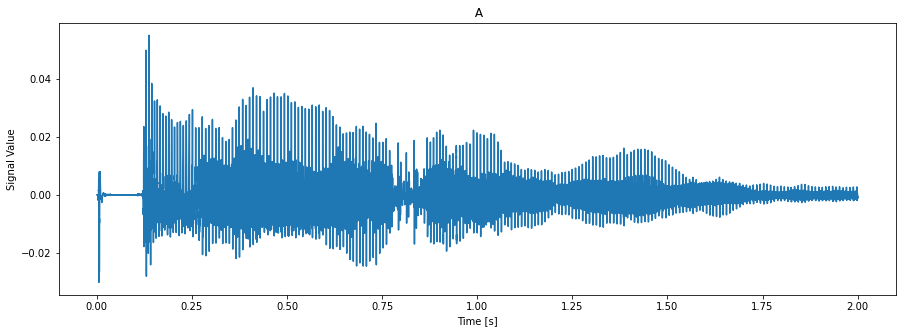

In [18]:
    sound = Sound('A')
    sound.plot(sound.samples, "", "Time [s]", "Signal Value", sound.getTimeAxis())

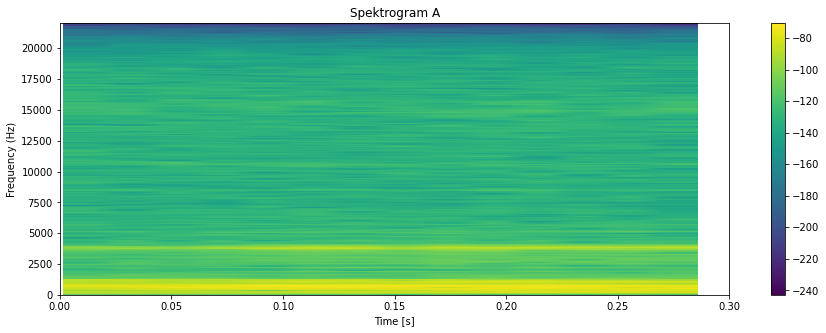

In [19]:
    sound.cutSignal(1.2, 1.5)
    sound.drawSpectrogram()

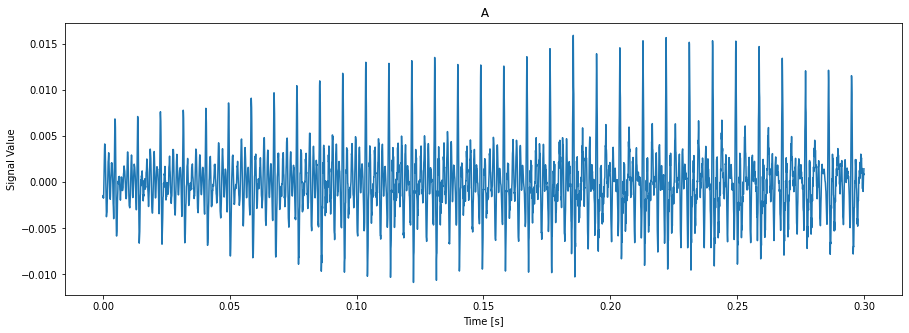

In [20]:
    sound.decimate(3)
    sound.plot(sound.samples, "", "Time [s]", "Signal Value", sound.getTimeAxis())

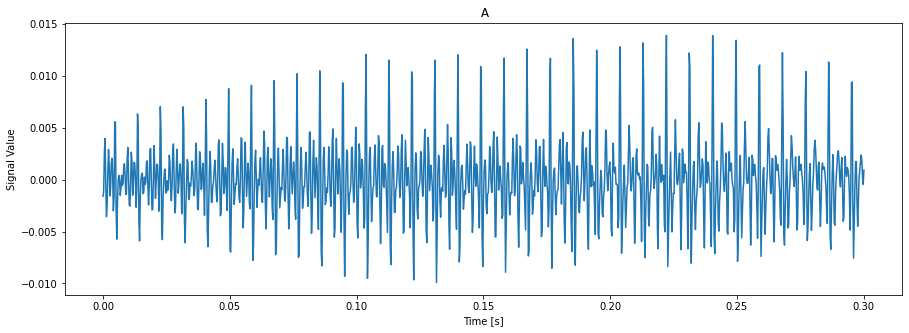

In [21]:
    sound.decimate(4)
    sound.plot(sound.samples, "", "Time [s]", "Signal Value", sound.getTimeAxis())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


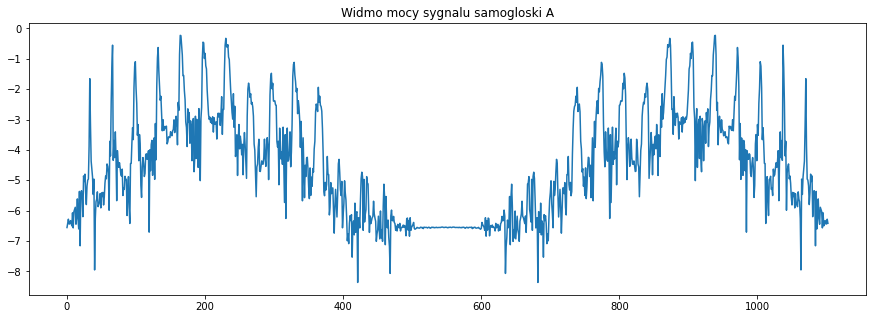

In [22]:
    sound.calcLogSpectrum()
    sound.plot(sound.logSpectrum, "Widmo mocy sygnalu samogloski")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


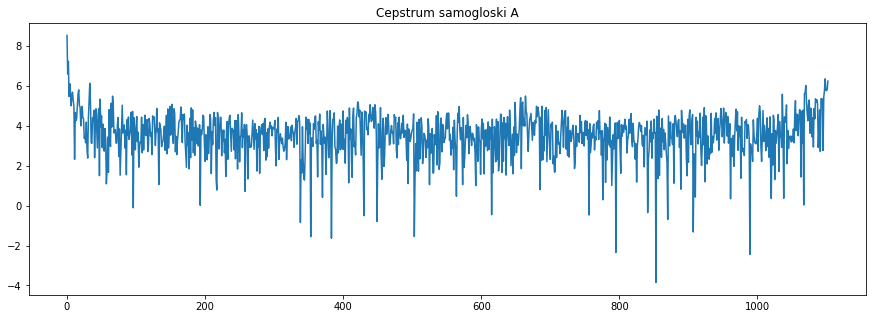

In [23]:
    sound.calcCepstrum()
    sound.plot(sound.cepstrum, "Cepstrum samogloski")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


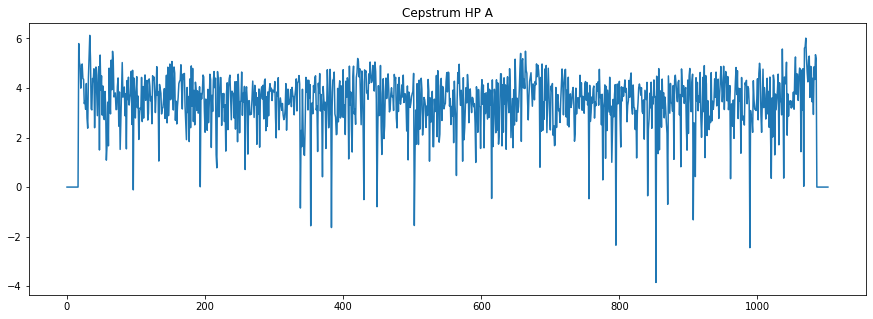

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


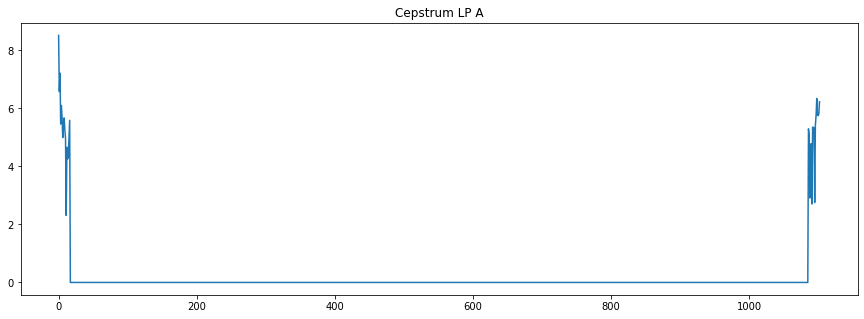

In [24]:
    sound.filter(0.015)
    sound.plot(sound.cepstrumHP, "Cepstrum HP")
    sound.plot(sound.cepstrumLP, "Cepstrum LP")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


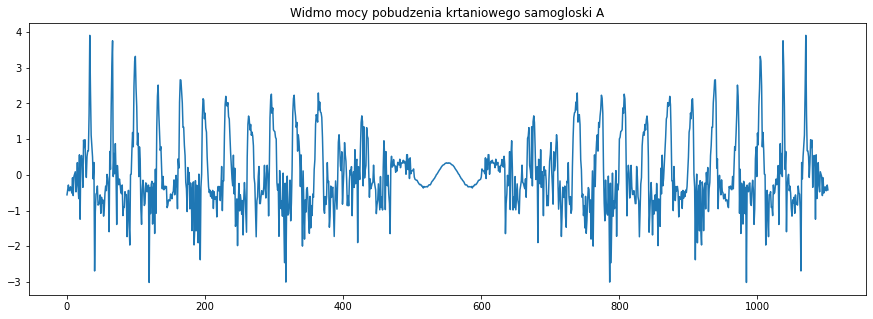

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


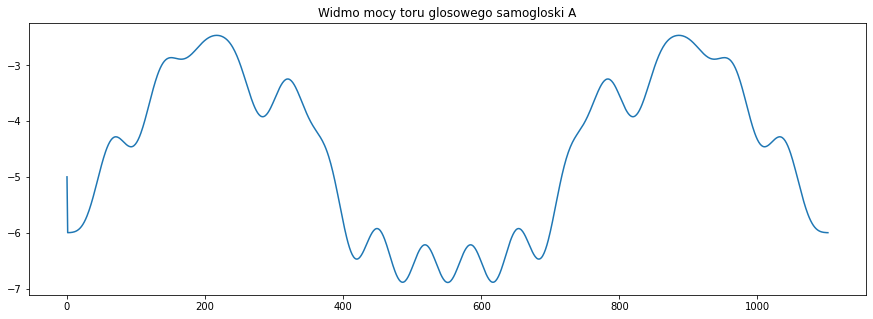

In [25]:
    sound.calcReversedLogSpectrums()
    sound.plot(sound.logSpectrumHP, "Widmo mocy pobudzenia krtaniowego samogloski")
    sound.plot(sound.logSpectrumLP, "Widmo mocy toru glosowego samogloski")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


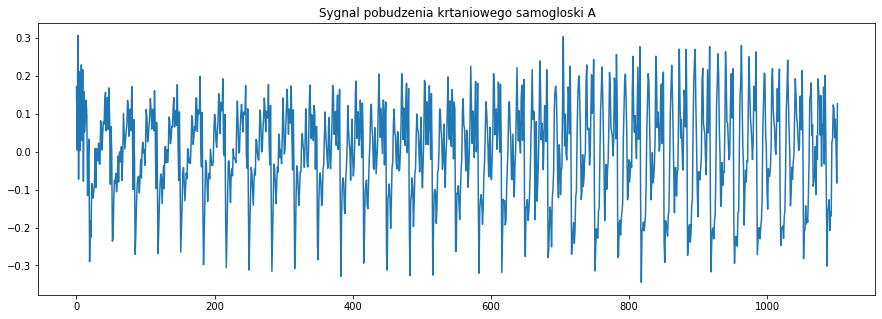

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


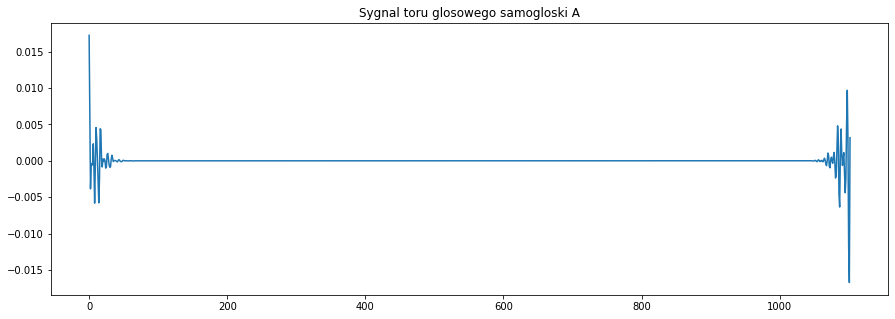

In [27]:
    sound.calcReversedSignals()
    sound.plot(sound.signalHP, "Sygnal pobudzenia krtaniowego samogloski")
    sound.plot(sound.signalLP, "Sygnal toru glosowego samogloski")

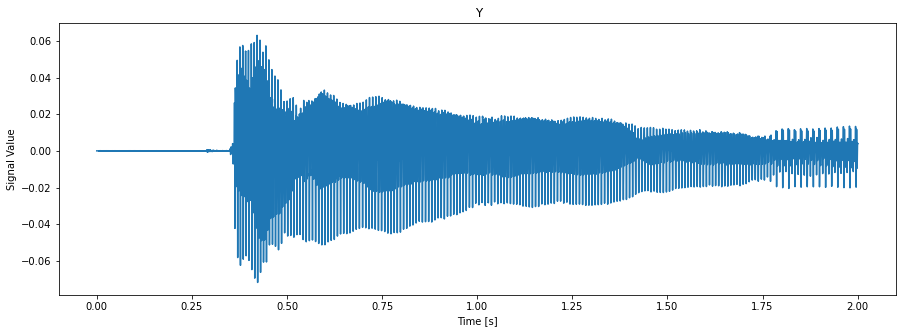

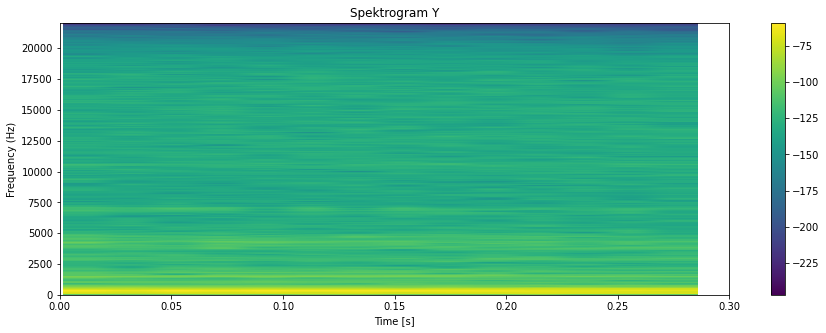

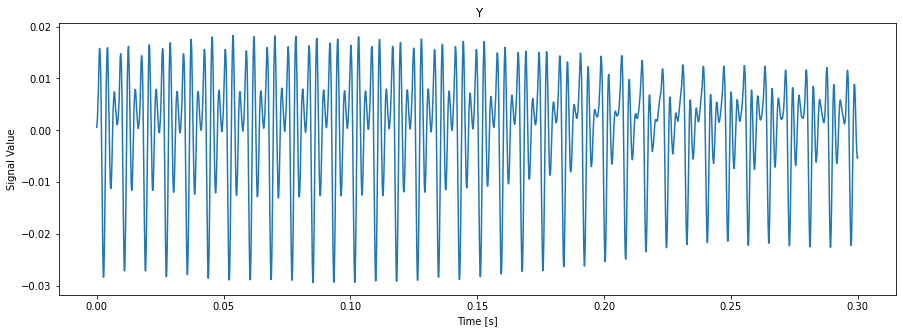

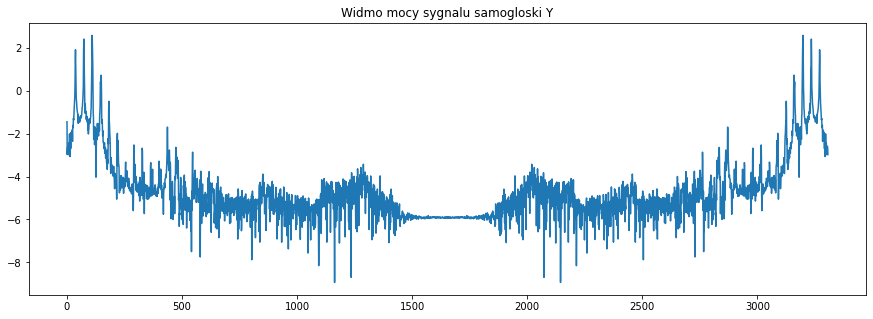

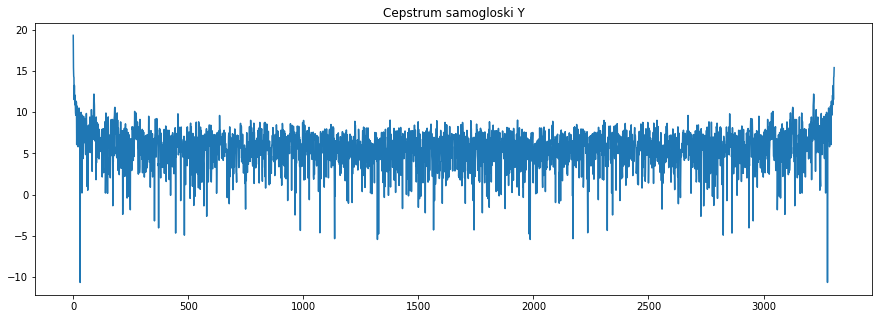

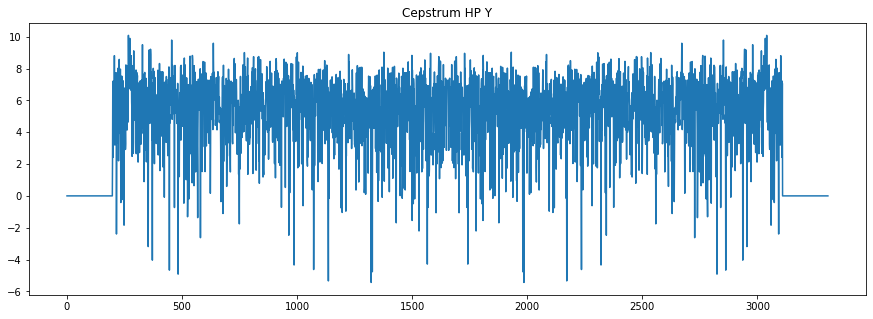

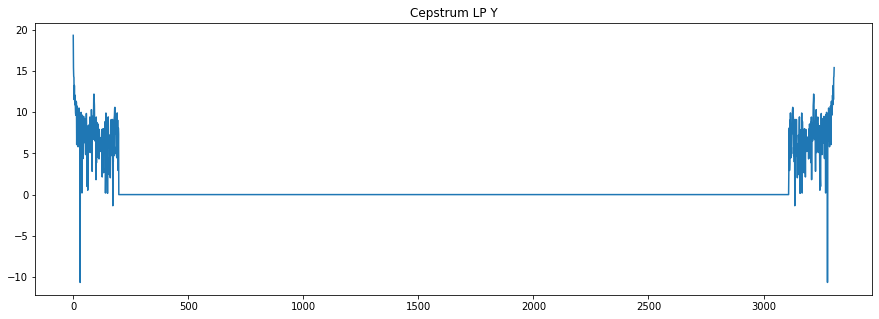

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


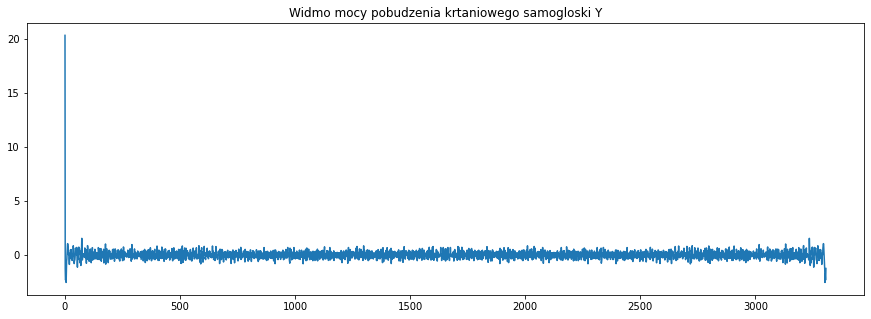

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


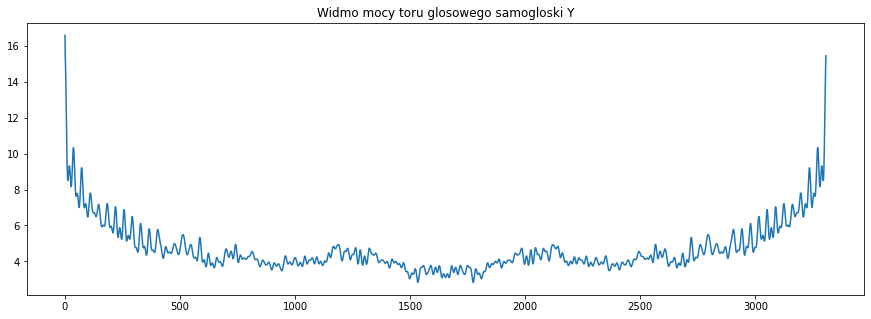

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


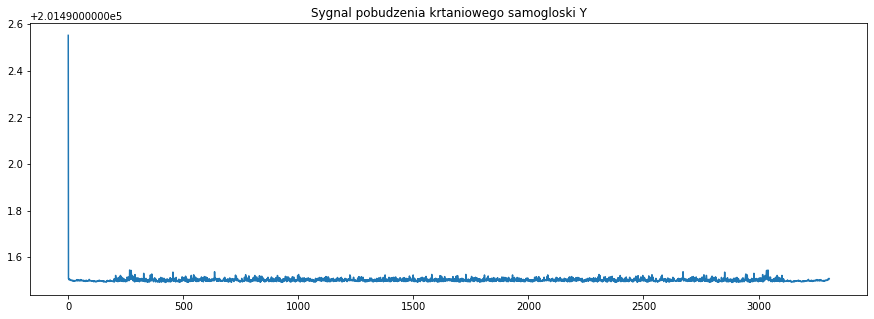

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


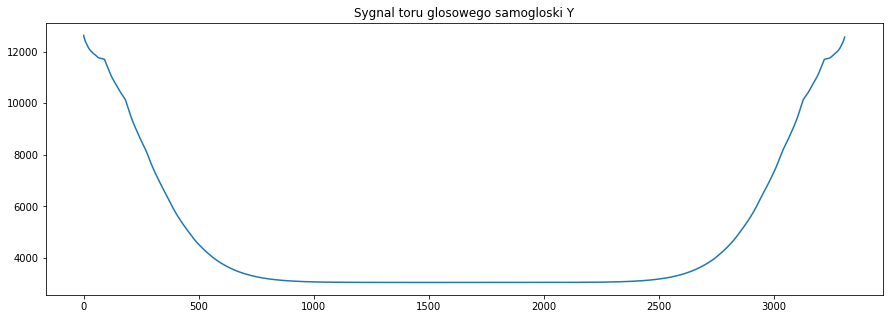

In [5]:
    sound = Sound('Y')
    sound.plot(sound.samples, "", "Time [s]", "Signal Value", sound.getTimeAxis())
    sound.cutSignal(1.2, 1.5)
    sound.drawSpectrogram()
    sound.decimate(4)
    sound.plot(sound.samples, "", "Time [s]", "Signal Value", sound.getTimeAxis())
    sound.calcLogSpectrum()
    sound.plot(sound.logSpectrum, "Widmo mocy sygnalu samogloski")
    sound.calcCepstrum()
    sound.plot(sound.cepstrum, "Cepstrum samogloski")

    sound.filter(0.06)
    sound.plot(sound.cepstrumHP, "Cepstrum HP")
    sound.plot(sound.cepstrumLP, "Cepstrum LP")

    sound.calcReversedLogSpectrums()
    sound.plot(sound.logSpectrumHP, "Widmo mocy pobudzenia krtaniowego samogloski")
    sound.plot(sound.logSpectrumLP, "Widmo mocy toru glosowego samogloski")

    sound.calcReversedSignals()
    sound.plot(sound.signalHP, "Sygnal pobudzenia krtaniowego samogloski")
    sound.plot(sound.signalLP, "Sygnal toru glosowego samogloski")